In [21]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# magic commands
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format  # avoid scientific notation using exponent, display up to two digital places instead

from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [5]:
os.chdir('D:\\Projects\\DataScience\\Kaggle_DataScience\\Starship_Titanic\\spaceship-titanic')

In [6]:
os.getcwd()

'D:\\Projects\\DataScience\\Kaggle_DataScience\\Starship_Titanic\\spaceship-titanic'

In [7]:
os.listdir()

['sample_submission.csv', 'test.csv', 'train.csv']

In [8]:
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.00,False,0.00,0.00,0.00,0.00,0.00,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.00,False,109.00,9.00,25.00,549.00,44.00,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.00,True,43.00,3576.00,0.00,6715.00,49.00,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.00,False,0.00,1283.00,371.00,3329.00,193.00,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.00,False,303.00,70.00,151.00,565.00,2.00,Willy Santantines,True


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
# check objects
categories = []
for col in df_train.columns:
    if df_train.loc[:, col].dtypes == 'object':
        print('-------')
        print(col)
        print('no. unique values', df_train.loc[:, col].nunique())
        print('nans', df_train.loc[:, col].isna().sum())
        print('unique values', df_train.loc[:, col].unique())
        categories.append(col)

-------
PassengerId
no. unique values 8693
nans 0
unique values ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
-------
HomePlanet
no. unique values 3
nans 201
unique values ['Europa' 'Earth' 'Mars' nan]
-------
CryoSleep
no. unique values 2
nans 217
unique values [False True nan]
-------
Cabin
no. unique values 6560
nans 199
unique values ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
-------
Destination
no. unique values 3
nans 182
unique values ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
-------
VIP
no. unique values 2
nans 203
unique values [False True nan]
-------
Name
no. unique values 8473
nans 200
unique values ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


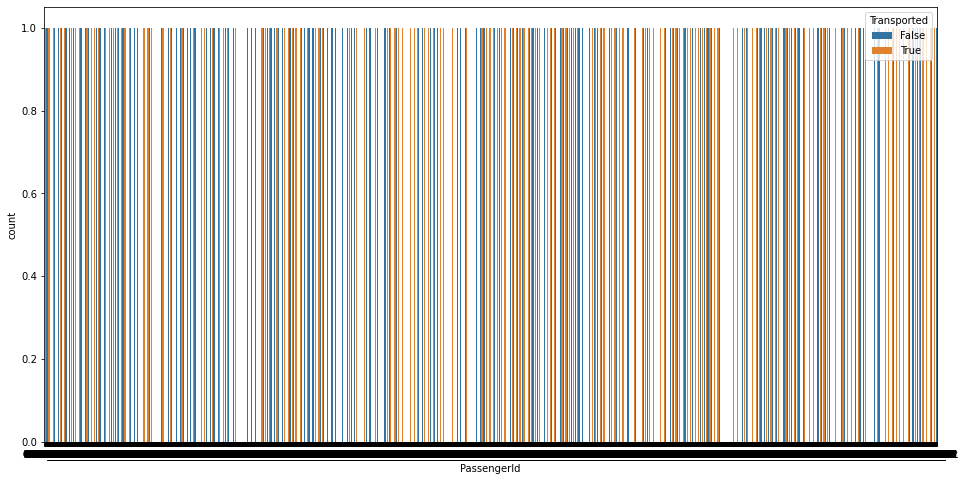

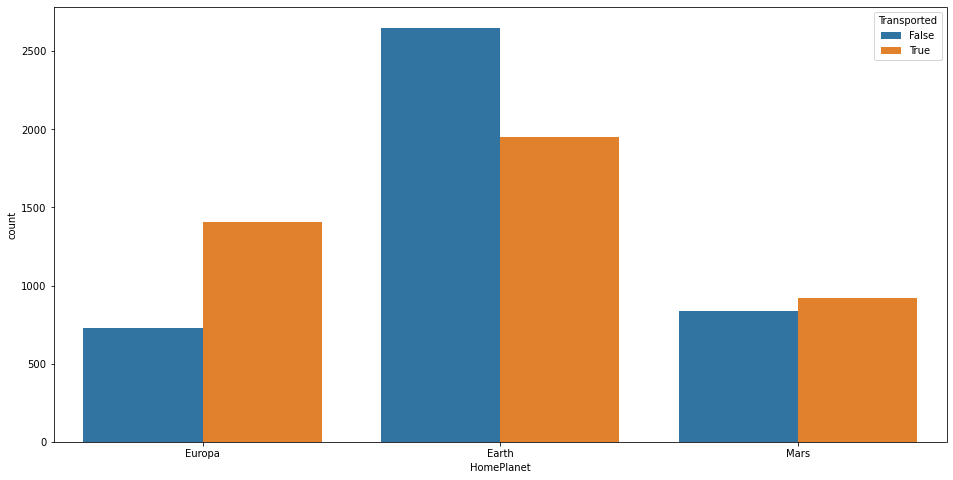

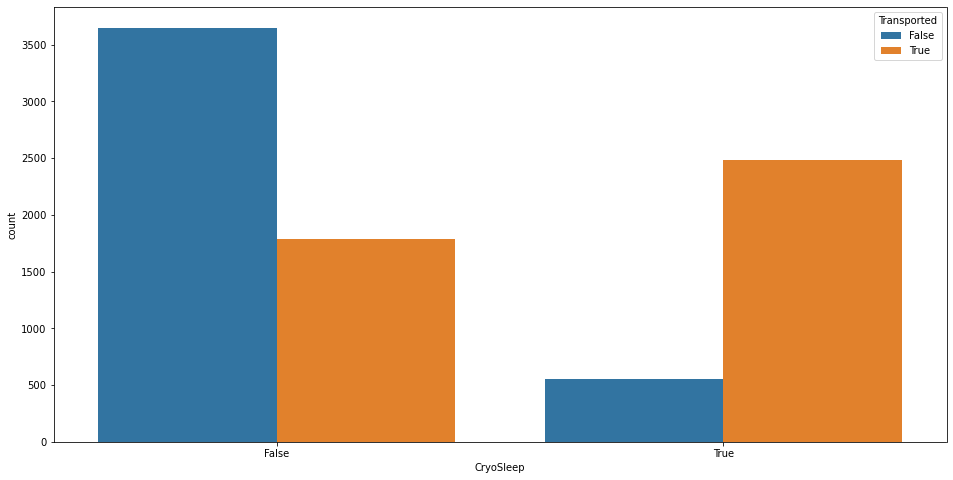

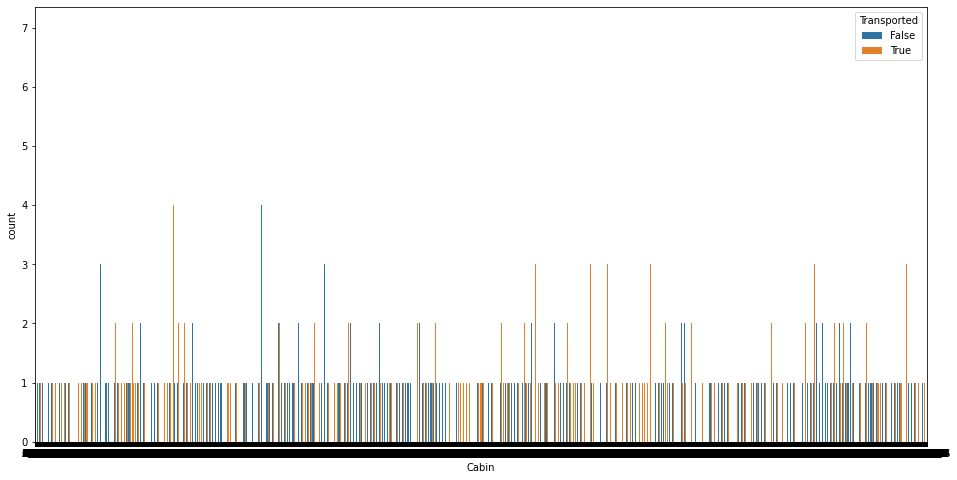

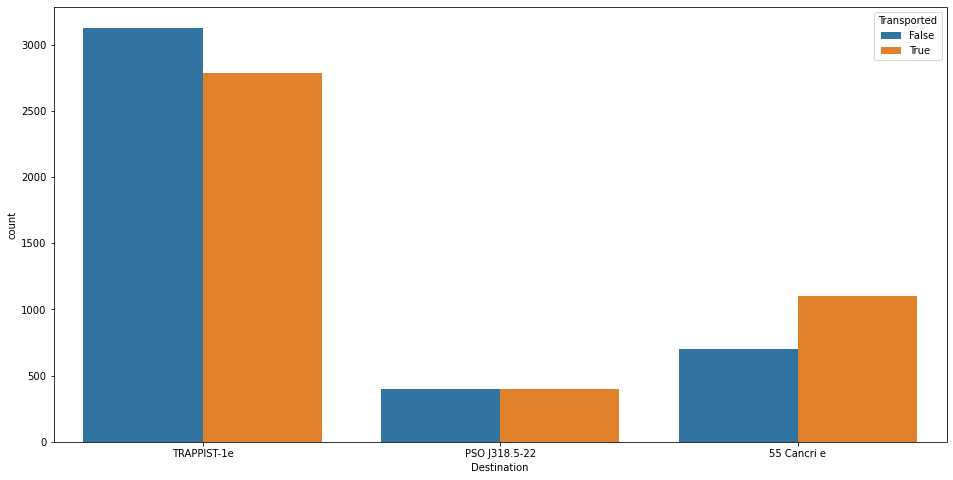

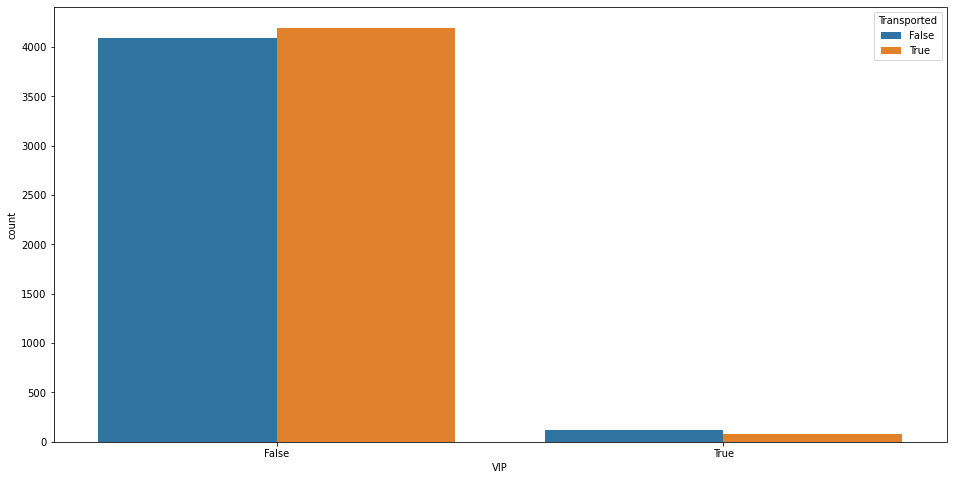

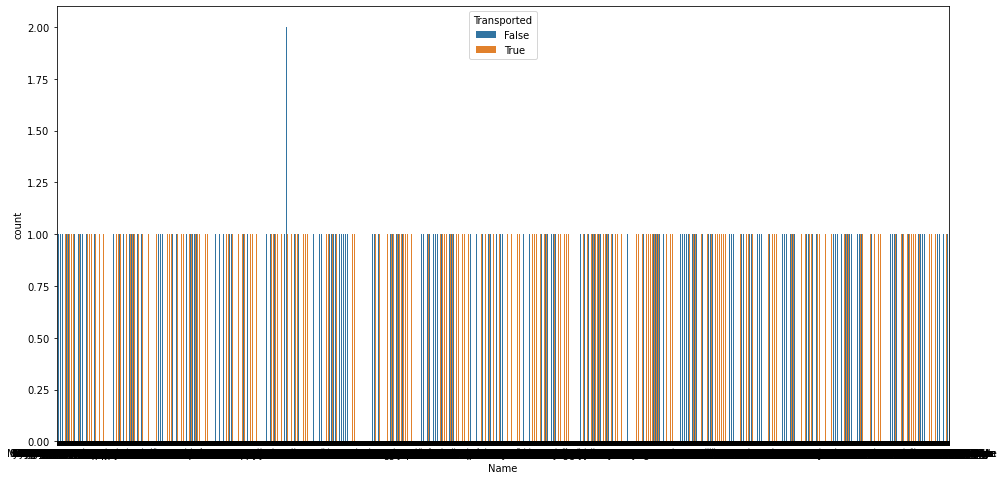

In [11]:
for col in categories:
    fig, ax = plt.subplots(figsize=(16,8))
    sns.countplot(data=df_train, x=col, hue='Transported', ax=ax)

In [ ]:
# VIP doesn´t matter
# HomePlanet looks promising
# CryoSleep is a Keeper
# Destination...maybe

In [22]:
# check numerics
numerics = []
for col in df_train.columns:
    if df_train.loc[:, col].dtypes in ['int64', 'float64']:
        print('-------')
        print(col)
        print('no. unique values', df_train.loc[:, col].nunique())
        print('nans', df_train.loc[:, col].isna().sum())
        numerics.append(col)

-------
Age
no. unique values 80
nans 179
-------
RoomService
no. unique values 1273
nans 181
-------
FoodCourt
no. unique values 1507
nans 183
-------
ShoppingMall
no. unique values 1115
nans 208
-------
Spa
no. unique values 1327
nans 183
-------
VRDeck
no. unique values 1306
nans 188


In [13]:
print('duplicates', df_train.duplicated().sum())

duplicates 0


In [15]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.00,8512.00,8510.00,8485.00,8510.00,8505.00
mean,28.83,224.69,458.08,173.73,311.14,304.85
std,14.49,666.72,1611.49,604.70,1136.71,1145.72
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,0.00,0.00,0.00,0.00
50%,27.00,0.00,0.00,0.00,0.00,0.00
75%,38.00,47.00,76.00,27.00,59.00,46.00
max,79.00,14327.00,29813.00,23492.00,22408.00,24133.00


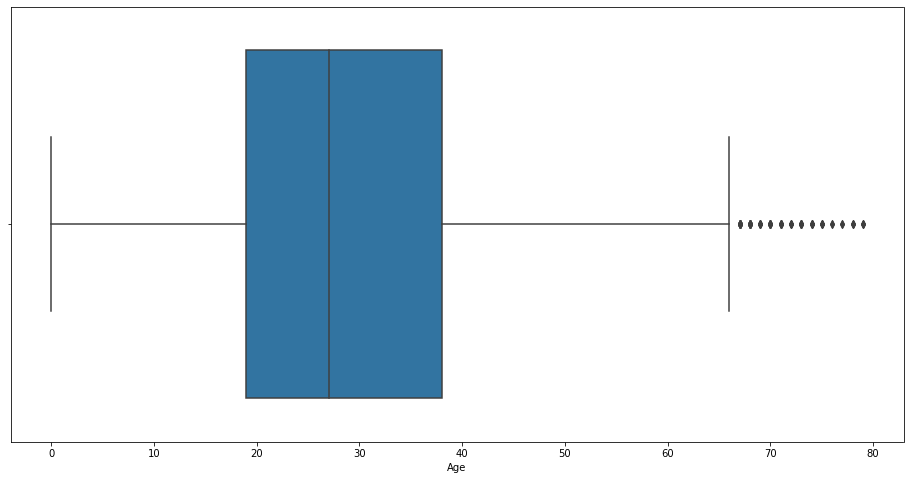

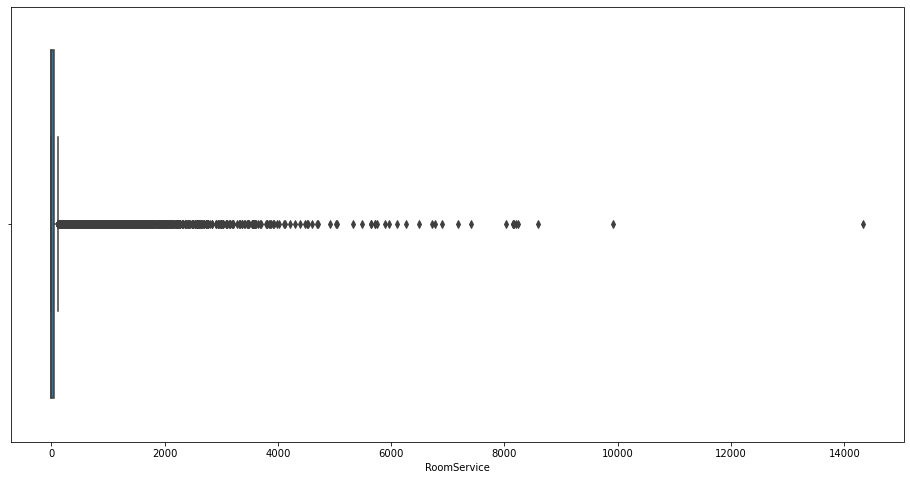

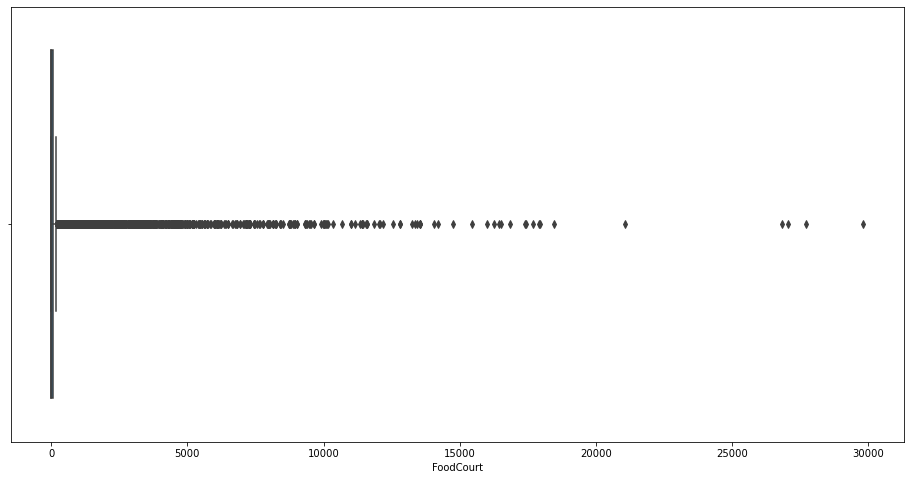

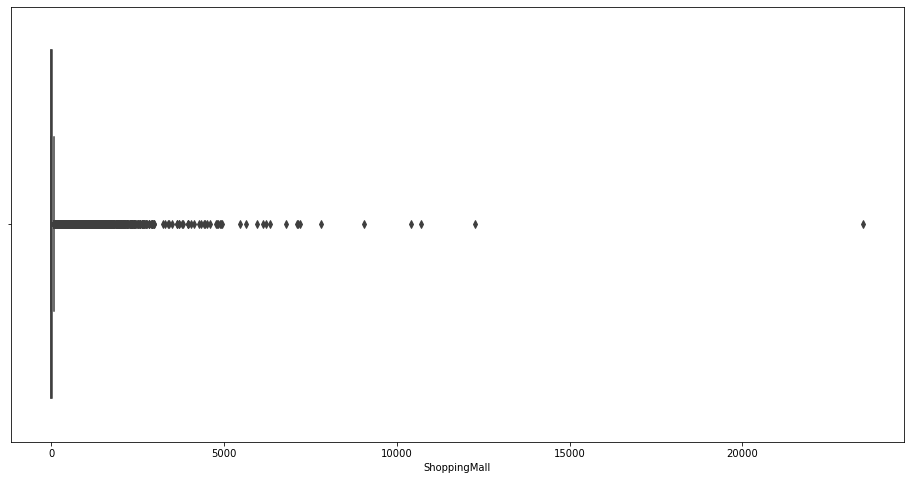

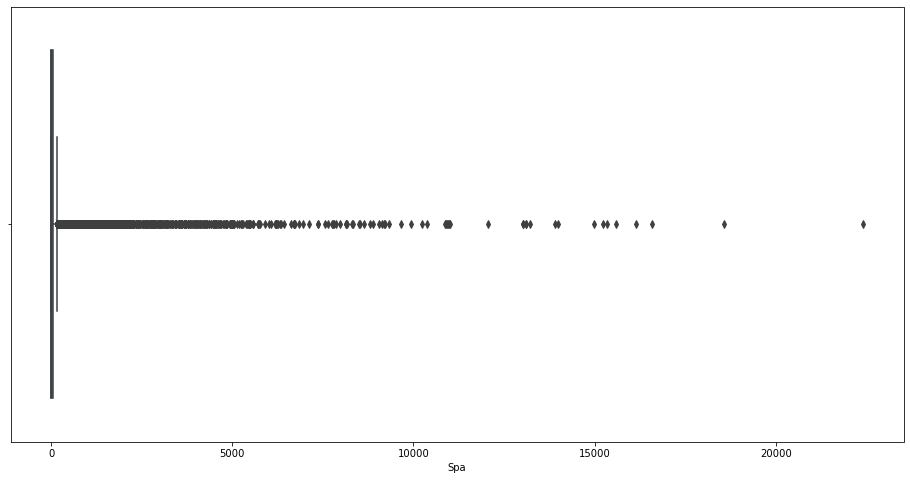

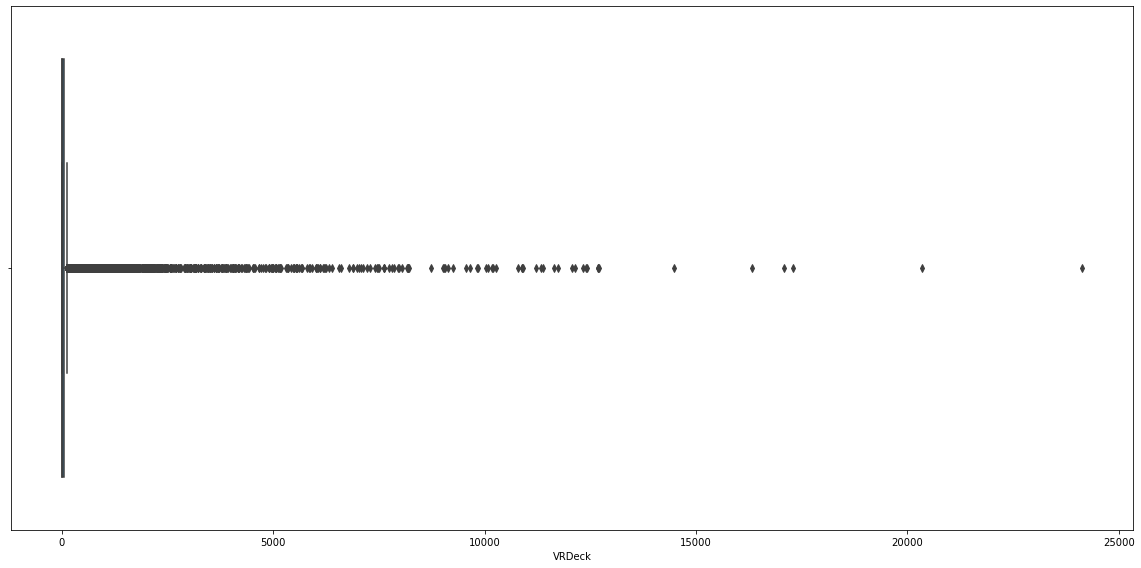

In [25]:
# boxplots
for i in range(len(numerics)):
    fig, ax = plt.subplots(figsize=(16,8))
    sns.boxplot(df_train.loc[:, numerics[i]])
    
fig.tight_layout()

In [ ]:
# correlation
fig, ax = plt.subplots(figsize=(12,12))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, mask=mask, ax=ax)

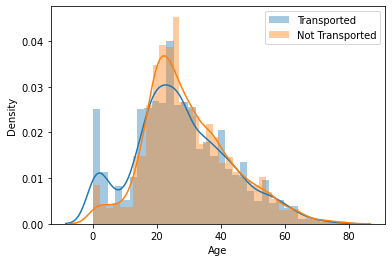

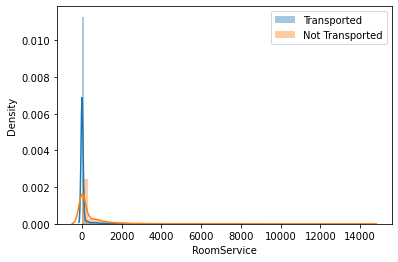

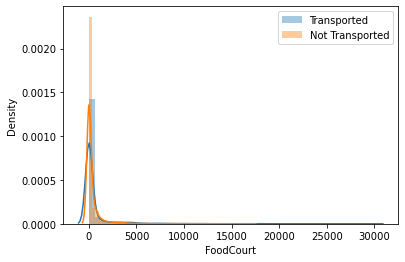

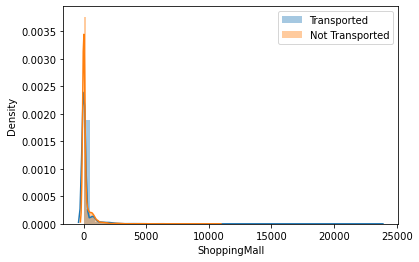

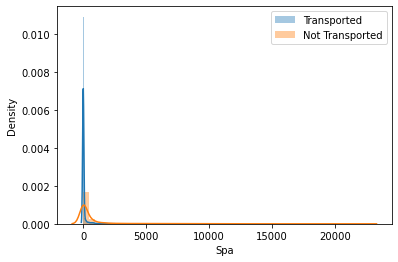

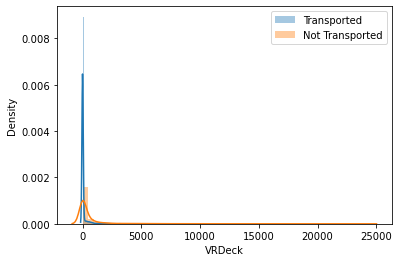

In [23]:
for col in numerics: 
    fig, ax = plt.subplots()
    mask_beamed = df_train.loc[:, 'Transported'] == 1
    was_beamed = df_train.loc[mask_beamed, col]
    was_notbeamed = df_train.loc[~mask_beamed, col]
    sns.distplot(was_beamed, label='Transported', ax=ax)
    sns.distplot(was_notbeamed, label='Not Transported', ax=ax)
    plt.legend()
    plt.show()

In [ ]:
# age seems to matter